In [1]:
import numpy as np
import sys
import dimod
import matplotlib.pyplot as plt

from dwave.system import EmbeddingComposite, DWaveSampler
from pythia_generator import generator
from qubo_generator import make_qubo
from embedding_generator import generate_embedding

In [3]:
particles = generator()

qubo, offset = make_qubo(particles, np.pi/2.)

In [4]:
sampler = EmbeddingComposite(DWaveSampler(solver='Advantage_system1.1'))

response = sampler.sample_qubo(qubo, num_reads=1000)

In [13]:
x_val = []
y_val = []
z_val = []

n_part = len(particles)

for i in range(0,n_part):
    key_x = 's[%s]' %i
    for j in range(0,n_part):
        key_y = 's[%s]' %j
        try:
            value = qubo[key_x, key_y]
            x_val.append(i)
            y_val.append(j)
            z_val.append(value)
        except KeyError:
            #print(key_x, key_y)
            continue

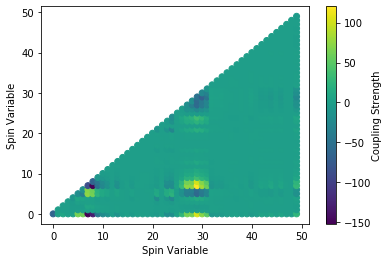

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

plt.scatter(x_val, y_val, c = z_val)
plt.xlabel('Spin Variable')
plt.ylabel('Spin Variable')

cbar = plt.colorbar()
cbar.set_label("Coupling Strength", labelpad=+1)

#plt.savefig('images/coupling_strength_pi2.png')
plt.show()

In [29]:
for i in range(len(x_val)):
    if(abs(z_val[i])> 100.):
        print(x_val[i], y_val[i]) 

7 0
8 0
8 7
29 0
29 7
29 8


', 's[4]'): 8.714248984554633,
 ('s[38]', 's[0]'): -0.9420356320848988,
 ('s[12]', 's[1]'): 0.04006394233697834,
 ('s[30]', 's[20]'): 0.3821284155530348,
 ('s[45]', 's[6]'): -0.7472510114842058,
 ('s[26]', 's[25]'): -0.8332673328796596,
 ('s[43]', 's[12]'): 0.03807314006405099,
 ('s[20]', 's[19]'): -0.6289525015566899,
 ('s[49]', 's[37]'): -0.007699169585749742,
 ('s[44]', 's[33]'): 0.15224359404722512,
 ('s[41]', 's[24]'): -0.27460441858683204,
 ('s[48]', 's[1]'): -0.0009299783541978451,
 ('s[9]', 's[2]'): 2.612852014552009,
 ('s[39]', 's[6]'): -0.37148639026707486,
 ('s[33]', 's[13]'): -0.8326974597585687,
 ('s[9]', 's[5]'): 22.57513077068726,
 ('s[48]', 's[18]'): -0.0024304790918904754,
 ('s[25]', 's[12]'): 0.06477766638671097,
 ('s[28]', 's[27]'): -34.69897286277595,
 ('s[26]', 's[10]'): 4.745392864386967,
 ('s[27]', 's[18]'): -0.03639754287819465,
 ('s[41]', 's[30]'): 0.09796379885503949,
 ('s[44]', 's[32]'): 0.3252285012085948,
 ('s[31]', 's[26]'): -11.616671191242103,
 ('s[43]',

In [34]:
import neal

sa_sampler = neal.SimulatedAnnealingSampler()
response_sa = sa_sampler.sample_qubo(qubo)

In [35]:
response_sa.first.sample

{'s[0]': 1,
 's[10]': 1,
 's[11]': 1,
 's[12]': 1,
 's[13]': 1,
 's[14]': 1,
 's[15]': 1,
 's[16]': 1,
 's[17]': 0,
 's[18]': 0,
 's[19]': 1,
 's[1]': 0,
 's[20]': 1,
 's[21]': 1,
 's[22]': 0,
 's[23]': 1,
 's[24]': 1,
 's[25]': 0,
 's[26]': 0,
 's[27]': 0,
 's[28]': 0,
 's[29]': 0,
 's[2]': 0,
 's[30]': 0,
 's[31]': 0,
 's[32]': 1,
 's[33]': 1,
 's[34]': 1,
 's[35]': 1,
 's[36]': 1,
 's[37]': 0,
 's[38]': 1,
 's[39]': 0,
 's[3]': 1,
 's[40]': 1,
 's[41]': 1,
 's[42]': 0,
 's[43]': 0,
 's[44]': 0,
 's[45]': 0,
 's[46]': 0,
 's[47]': 0,
 's[48]': 0,
 's[49]': 0,
 's[4]': 1,
 's[5]': 0,
 's[6]': 0,
 's[7]': 1,
 's[8]': 1,
 's[9]': 1}

In [12]:
for datum in response.data(['sample','energy']):
    print(datum.sample['s[0]'])

0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
1
1
1
0
1
1
1
1
0
0
1
1
0
1
1
1
1
1
0
0
1
0
0
1
0
1
0
1
0
1
0
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
1
1
1
0
1
0
0
1
0
1
0
0
0
1
0
1
1
1
1
1
1
0
1
0
0
0
0
1
1
1
1
0
1
0
1
0
0
1
1
0
0
1
1
1
0
1
0
0
1
0
1
1
1
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
1
1
0
0
1
0
0
0
1
0
1
0
0
0
1
1
1
0
1
1
1
0
0
1
1
0
1
0
0
1
0
0
1
1
0
0
1
0
1
0
1
0
1
1
0
1
0
1
1
1
1
1
0
0
1
1
0
1
1
1
0
1
1
1
0
0
1
0
1
0
1
0
1
1
0
0
0
0
1
0
0
0
1
1
0
0
1
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
1
0
0
0
1
1
1
0
0
1
0
1
1
0
1
0
0
0
1
1
0
0
1
1
1
0
0
0
1
0
0
1
0
1
1
0
1
0
1
1
0
1
0
1
1
0
0
0
0
1
1
0
1
0
0
1
0
1
1
1
0
1
1
0
1
1
0
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
0
0
0
1
0
0
1
1
1
1
1
1
1
0
0
0
0
1
0
1
1
0
1
0
1
1
0
0
1
0
1
0
0
0
1
0
0
1
0
1
1
1
1
1
1
0
0
0
0
1
0
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
0
1
0
1
1
0
0
0
1
0
1
1
1
0
0
1
0
1
0
0
1
1
0
0
1
0
1
1
0
0
1
1
0
1
